In [2]:
from sympy import *

import matplotlib.pyplot as plt
import numpy as np

init_printing()

# Simple version of the model

Suppose our agents have initial wealth drawn from a normal distribution. They then make a one time choice of stochastic process...Let's suppose they care about their relative rank in the distribution. What does that even mean, to care about relative rank? It can mean:

1) Agents care about being ranked higher than other agents, or
2) Agents care about being among the "elite", or
3) some combination of the two. 

If this is what agents care about, what does utility look like? 

Clearly, if the distribution of wealth of all agents is $G(x)$, then our particular agent's rank is just $G(x_i)$ or some function of it. The key thing to note is that, in general, $G(x)$ will have spots where it is increasing. We will have to think about this a bit, and what to do if there is no closed form. 



We have a transitional boundary...when $x>T$, one unit of flow profit is realized. when $x\leq T$, profits are zero. 

In [3]:
s_1, s_2, m_1, m_2, rho, x, T = symbols('s_1 s_2 m_1 m_2 rho x T')

F = Function('F')
G = Function('G')

In [4]:
pv1 = Derivative(F(x), x, x)*s_2**2/2 + Derivative(F(x), x)*m_1 - rho*F(x) + x
pv2 = Derivative(F(x), x, x)*s_2**2/2 + Derivative(F(x), x)*m_1 - rho*F(x) + x + 1

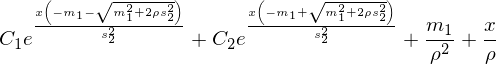

In [5]:
sol1 = dsolve(pv1).rhs
sol1

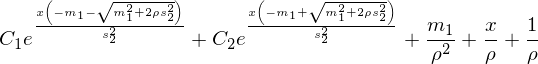

In [6]:
sol2 = dsolve(pv2).rhs
sol2

In [10]:
test = Derivative(F(x), x, x)*s_1**2/2 + Derivative(F(x), x)*m_1 - rho*F(x) + G(x)

The above is an equation with a generic $G(x)$ function, which will always be something like a cumulative distribution function - or even something like the positive distance above a mean. 

Now, let's consider a thought experiment. Let's first imagine the following game:

1) a proportion $p$ of agents start life as advantaged. They have $x_0=1$. 
2) a proportion $1-p$ of agents start life as disadvantages. They have $x_0=0$. 
3) agents care about their ultimate rank in society; that is, where they compare to other agents "in the end."
4) agents can choose a risky draw or a safe draw. the safe draw is $N(0,1)$ while the risky draw is $N(-\delta,\sigma^2)$.

Consider the equilibrium: all disadvantaged agents make risky choices, all priviledged agents make safe choices. When does this hold true? 



Under this structure, if agent $i$ is priviledged he beats other priviledged agents half of the time, but, since we need $x_i-x_j > -1$ for him to be ranked above a poor agent, or $1 >x_j-x_i$, and since $x_j-x_i$ is normally distributed with mean $-\delta_j$ and variance $1+\sigma^2$, we have: 


$$
EU=p\frac{1}{2} + (1-p)\Phi\left[\frac{1+\delta}{\sqrt{1+\sigma^2}}\right] 
$$

If our priviledged agent bucked the strategy, and instead went risky, we want to know the probability that $x_j-x_i<0$. This has mean $\delta$ and variance $1+\sigma^2$, so we have:

$$
EU = p\left[\frac{-\delta}{\sqrt{1+\sigma^2}}\right] + (1-p)\Phi\left[\frac{1}{\sqrt{2}\sigma}\right] 
$$

From this, it is clear that the agent loses utility on both ends. 

What about low types? In this case, we have the following:

$$
EU = (1-p)\frac{1}{2}+p\Phi\left[\frac{-1-\delta}{\sqrt{1+\sigma^2}}\right]
$$

If our agent bucked the strategy, he would get utility:

$$
EU = (1-p)\left[\frac{\delta}{\sqrt{1+\sigma^2}}\right] + p\Phi\left[\frac{-1}{\sqrt{2}}\right] 
$$

A lesson is that most of the tension comes from the low types. Clearly, playing it safe means more of the low types will be outranked, but not playing it safe means that more of the high types will be beaten out. For some parameters, we will be okay. 

What about Brownian motion where agents care only about rank at any given time? Let's suppose that all agents start at initial wealth 0, and that wealth then evolves according to a Brownian motion which can either be standard, or can have negative drift $-\delta$ with greater variance $\sigma$. 

Suppose our man is fighting against some long-run distribution $G(x)$ (which will have to be derived). 

My guess: individuals start out safe, but play risky for $\underline{x},\overline{x}$, and so on. At any point, however, we have to have the expected flow return governed by:

In [15]:
s, m, rho, x = symbols('s m rho x')

F = Function('F')
G = Function('G')

In [17]:
deq = Derivative(F(x), x, x)*s**2/2 + Derivative(F(x), x)*m - rho*F(x) + G(x)

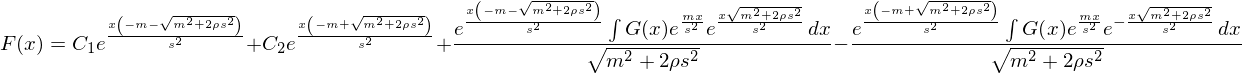

In [19]:
dsolve(deq)

To try and make a little headway with this equation, let's call the positive root $\alpha_1$ and the negative one $\beta_1$. We can also simplify by using this equation at the top and bottom, so it will be:

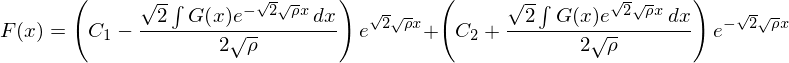

In [22]:
deqsafe = Derivative(F(x), x, x)/2 -rho *F(x) + G(x)
dsolve(deqsafe)

Note that this can be written as;

$$
F(x) = C_1e^{2\sqrt{\rho}x}+C_2e^{-2\sqrt{\rho}x} + \frac{1}{2\sqrt{\rho}}
$$

Now, we would expect that our Brownian motion hits transitional boundaries - but almost always, for the "

We would guess that $C_1$ should be zero in the first equation, while $C_2$ should be zero in the second. hence:

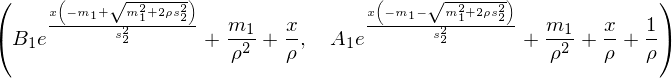

In [6]:
A1, B1 = symbols('A1 B1')
F1 = sol1.subs({'C1':0, 'C2':'B1'})
F2 = sol2.subs({'C2':0, 'C1':'A1'})
F1, F2

Now, we have value matching and smooth contact conditions at the transitional boundary of $T$:

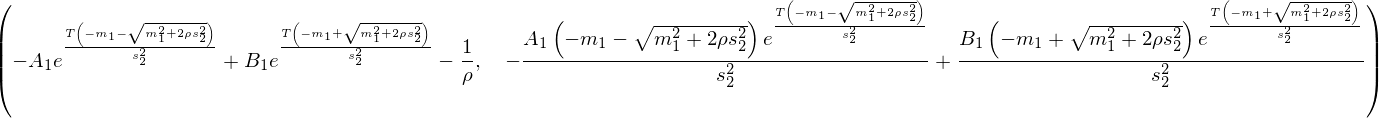

In [7]:
eq1 = F1.subs({x:T}) - F2.subs({x:T})
eq2 = F1.diff(x).subs({x:T}) - F2.diff(x).subs({x:T})
eq1, eq2

In [8]:
constsols = solve([eq1, eq2], [A1, B1])

In [9]:
F1 = F1.subs(constsols)
F2 = F2.subs(constsols)

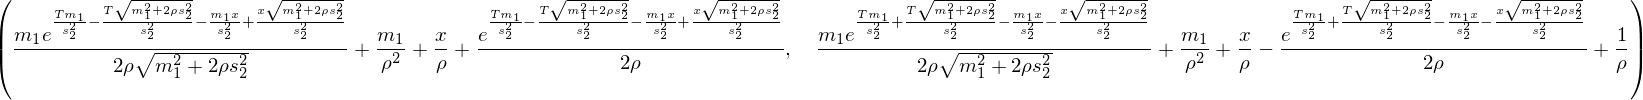

In [10]:
F1.simplify(), F2.simplify()

If I am not mistaken, I can rewrite these as:

$$
F_1(x) = \frac{m+\sqrt{m^2+2\rho s^2}}{2\rho\sqrt{m^2+2\rho s^2}}e^{\frac{(T-x)(m-\sqrt{m^2+2\rho s^2})}{s^2}}
$$

$$
F_2(x) = \frac{m-\sqrt{m^2+2\rho s^2}}{2\rho\sqrt{m^2+2\rho s^2}}e^{\frac{(T-x)(m+\sqrt{m^2+2\rho s^2})}{s^2}}+\frac{1}{\rho}
$$

In [11]:
def val1(x, m, s, rho, T):
    z     = np.sqrt(m**2 + 2*rho*s**2)
    C     = (m + z)/(2 * rho * z)
    eterm = (T - x)*(m - z)/s**2
    
    return C*np.exp(eterm)

def val2(x, m, s, rho, T):
    z     = np.sqrt(m**2 + 2*rho*s**2)
    C     = (m - z)/(2 * rho * z)
    eterm = (T - x)*(m + z)/s**2    
    
    return 1 / rho + C*np.exp(eterm)

In [12]:
def val(x, m, s, rho, T):
    return val1(x, m, s, rho, T)*(x < T) + val2(x, m, s, rho, T)*(x>=T)



In [13]:
xr  = np.arange(-4,4,.01)
Te   = 1
rhoe = .5
se = 1
me   = 0
dme  = -.1
dse  = .53
ev1 = val(xr, me, se, rhoe, Te)
ev2 = val(xr, me + dme, se + dse, rhoe, Te)

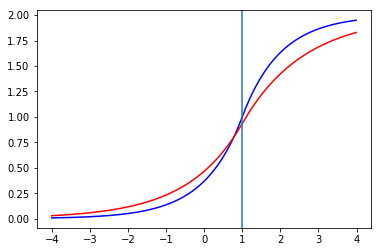

In [14]:
plt.plot(xr, ev1, color='blue')
plt.plot(xr, ev2, color='red')
plt.axvline(Te)

So, we see that these equations cross at a particular point, which implies that our guy would like to choose the riskier path for sufficiently small initial $x$. The point of intersection is just below $V$. So, now we actually have three things to paste together: 

1. The in the money part of the equation
2. The out of the money but safe part of the equation, and
3. The out of the money but risky part.

In [15]:
ds, dm = symbols('ds dm')

pv0 = Derivative(F(x), x, x)*s_2**2/2 + Derivative(F(x), x)*m_2 - rho*F(x)
pv1 = Derivative(F(x), x, x)*s_1**2/2 + Derivative(F(x), x)*m_1 - rho*F(x)
pv2 = Derivative(F(x), x, x)*s_1**2/2 + Derivative(F(x), x)*m_1 - rho*F(x) + 1

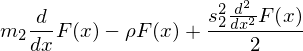

In [16]:
pv0

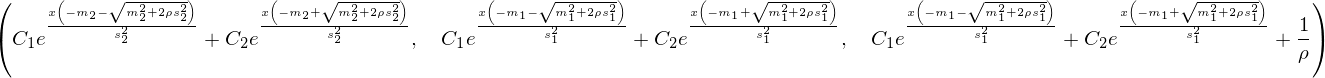

In [17]:
sol0 = dsolve(pv0).rhs
sol1 = dsolve(pv1).rhs
sol2 = dsolve(pv2).rhs
sol0, sol1, sol2

In [18]:
A2, B2, E2, D2 = symbols('A2 B2 E2 D2')
G0 = sol0.subs({'C1':0, 'C2':A2})
G1 = sol1.subs({'C2':B2, 'C1':D2})
G2 = sol2.subs({'C2':0, 'C1':E2})

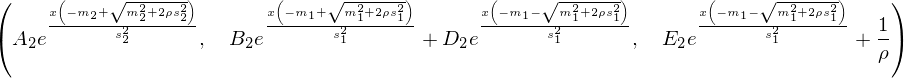

In [19]:
G0, G1, G2

These four unknowns need four equations. we have value matching conditions and smooth pasting conditions. But we also need a fifth condition because $t_s$, the switching condition, isn't known. Anyways:

In [20]:
t_s = symbols('t_s')

eq1 = G0.subs({x:t_s}) - G1.subs({x:t_s})
eq2 = G0.diff(x).subs({x:t_s}) - G1.diff(x).subs({x:t_s})
eq3 = G1.subs({x:T}) - G2.subs({x:T})
eq4 = G1.diff(x).subs({x:T}) - G2.diff(x).subs({x:T})

# Distribution

Ultimately, we will need to know something about the long-run distribution of the population. To intuit things about this, we usually think about the Komolgorov equations. 

So, let's not worry about the switching point yet, even though we know it is there. Let's also suppose that at every period, a random fraction of all people $\rho$ dies, and a new bunch of people enter at wealth $\overline{x}$. 

Now, for the typical person, there are two ways this person could hit wealth level $x$. It would be as:

$$
\pi(x,t+\Delta t) = (1-r) [p\pi(x-\Delta h,t)+q\pi(x+\Delta h,t)]
$$

This is the probability they survive a given period, and then move either down or up. We use the Taylors series:

$$
\pi(x-\Delta h,t)=\pi-\pi_x\Delta h+\frac{1}{2}\pi_{xx}(\Delta h)^2,\quad  \pi(x+\Delta h,t)=\pi+\pi_x\Delta h+\frac{1}{2}\pi_{xx}(\Delta h)^2
$$

Forging onwards, we get:

$$
\pi+\pi_t\Delta t=(1-r) [p\left(\pi-\pi_x\Delta h+\frac{1}{2}\pi_{xx}(\Delta h)^2\right)+q\left(\pi+\pi_x\Delta h+\frac{1}{2}\pi_{xx}(\Delta h)^2\right)]
$$

Our expressions for $p$ and $q$ are:

$$
p=\frac{1}{2}(1+\frac{\mu}{\sigma^2}\Delta h),\quad q=\frac{1}{2}(1-\frac{\mu}{\sigma^2}\Delta h)
$$

So, now we can use the fact that $p+q=1$ first to get our expression as:

$$
\pi+\pi_t\Delta t=(1-r) [\pi+(q-p)\pi_x\Delta h+\frac{1}{2}\pi_{xx}(\Delta h)^2]
$$
or
$$
\pi+\pi_t\Delta t=(1-r) [\pi-\frac{\mu}{\sigma^2}\pi_x(\Delta h)^2+\frac{1}{2}\pi_{xx}(\Delta h)^2]
$$

We can now make the substitution $(\Delta h)^2=\sigma^2\Delta t$

$$
\pi+\pi_t\Delta t=(1-r) [\pi-\mu\pi_x\Delta t+\frac{\sigma^2}{2}\pi_{xx}\Delta t]
$$
    

# Stationary distribution with death and replacement

We also can imagine that the deaths in a particular time period are proportional to $\Delta t$, say $\rho \Delta t$, so deaths occur according to a poisson process. 

By the same token, dead individuals are immediately replaced, according to a Laplace distribution centered at $x_0$. Then, at any given value of $x<x_0$, we have:

$$
\pi+\pi_t\Delta t=(1-\rho\Delta t) [\pi-\mu\pi_x\Delta t+\frac{\sigma^2}{2}\pi_{xx}\Delta t]
$$

Expanding this out, and observing that all smaller terms will go to zero very quickly, we get:

$$
\pi+\pi_t\Delta t=\pi-\mu\pi_x\Delta t+\frac{\sigma^2}{2}\pi_{xx}\Delta t -\rho \Delta t \pi
$$

Making cancellations, we are left with:

$$
\pi_t\Delta t=-\mu\pi_x\Delta t+\frac{\sigma^2}{2}\pi_{xx}\Delta t -\rho \Delta t \pi
$$

Bit this doesn't consider inflow, which would typically make the above equation something like:

$$
\pi_t=-\mu\pi_x+\frac{\sigma^2}{2}\pi_{xx} -\rho \pi + \rho \phi(x)
$$

Or in stationary form:

$$
\frac{\sigma^2}{2}\pi_{xx}-\mu\pi_x -\rho \pi + \rho \phi(x)=0
$$



In [39]:
m, s, r, x, k = symbols('m s r x k')
f = Function('f')
g = Function('g')
F = f(x)
G = g(x)

In [44]:
deq = F.diff(x,x)*s/2 - m*F.diff(x)-r*F+r*exp(-x**2/2)/sqrt(2*pi)

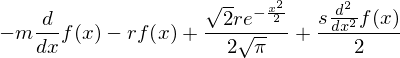

In [45]:
deq

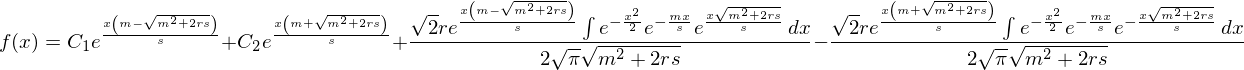

In [46]:
dsolve(deq)

In [51]:
deq2 = G.diff(x,x)*s/2 - m*G.diff(x)-r*G+r*k*exp(-x*k)/2

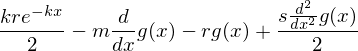

In [52]:
deq2

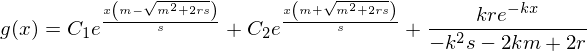

In [53]:
dsolve(deq2)

This might be easier to deal with...Note two things:

a centered laplace distribution has density:

$$
\frac{1}{2b}e^{-\frac{|x-m|}{b}}
$$